In [1]:
import warnings
warnings.filterwarnings('ignore')   
import os
from pathlib import Path

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go


import numpy as np
from numpy import array
from numpy import reshape

from scipy import stats
from scipy.stats import ttest_ind
sns.set()


In [2]:
game_data = pd.read_csv('/Users/eupirate/Desktop/CCT/cct_dal8_sep/DA_L8/s2_lecture_notes/visualization/data-visualisation-techniques-ca1-xiu-shi/vgsales.csv')
game_data.head()

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
0,Wii Sports,Wii,2006.0,Sports,Nintendo,41.36,28.96,3.77,8.45,82.53,76.0,51.0,8,322.0,Nintendo,E
1,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24,NaN,NaN,NaN,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.68,12.76,3.79,3.29,35.52,82.0,73.0,8.3,709.0,Nintendo,E
3,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.61,10.93,3.28,2.95,32.77,80.0,73.0,8,192.0,Nintendo,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
game_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16719 entries, 0 to 16718
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16717 non-null  object 
 1   Platform         16719 non-null  object 
 2   Year_of_Release  16450 non-null  float64
 3   Genre            16717 non-null  object 
 4   Publisher        16665 non-null  object 
 5   NA_Sales         16719 non-null  float64
 6   EU_Sales         16719 non-null  float64
 7   JP_Sales         16719 non-null  float64
 8   Other_Sales      16719 non-null  float64
 9   Global_Sales     16719 non-null  float64
 10  Critic_Score     8137 non-null   float64
 11  Critic_Count     8137 non-null   float64
 12  User_Score       10015 non-null  object 
 13  User_Count       7590 non-null   float64
 14  Developer        10096 non-null  object 
 15  Rating           9950 non-null   object 
dtypes: float64(9), object(7)
memory usage: 2.0+ MB


In [4]:
game_data.shape

(16719, 16)

In [5]:
game_data.describe()

,Year_of_Release,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Count
count,16450.000000,16719.000000,16719.000000,16719.000000,16719.000000,16719.000000,8137.000000,8137.000000,7590.000000
mean,2006.487356,0.263330,0.145025,0.077602,0.047332,0.533543,68.967679,26.360821,162.229908
std,5.878995,0.813514,0.503283,0.308818,0.186710,1.547935,13.938165,18.980495,561.282326
min,1980.000000,0.000000,0.000000,0.000000,0.000000,0.010000,13.000000,3.000000,4.000000
25%,2003.000000,0.000000,0.000000,0.000000,0.000000,0.060000,60.000000,12.000000,10.000000
50%,2007.000000,0.080000,0.020000,0.000000,0.010000,0.170000,71.000000,21.000000,24.000000
75%,2010.000000,0.240000,0.110000,0.040000,0.030000,0.470000,79.000000,36.000000,81.000000
max,2020.000000,41.360000,28.960000,10.220000,10.570000,82.530000,98.000000,113.000000,10665.000000


In [6]:
game_data.isnull().sum()

Name                  2
Platform              0
Year_of_Release     269
Genre                 2
Publisher            54
NA_Sales              0
EU_Sales              0
JP_Sales              0
Other_Sales           0
Global_Sales          0
Critic_Score       8582
Critic_Count       8582
User_Score         6704
User_Count         9129
Developer          6623
Rating             6769
dtype: int64

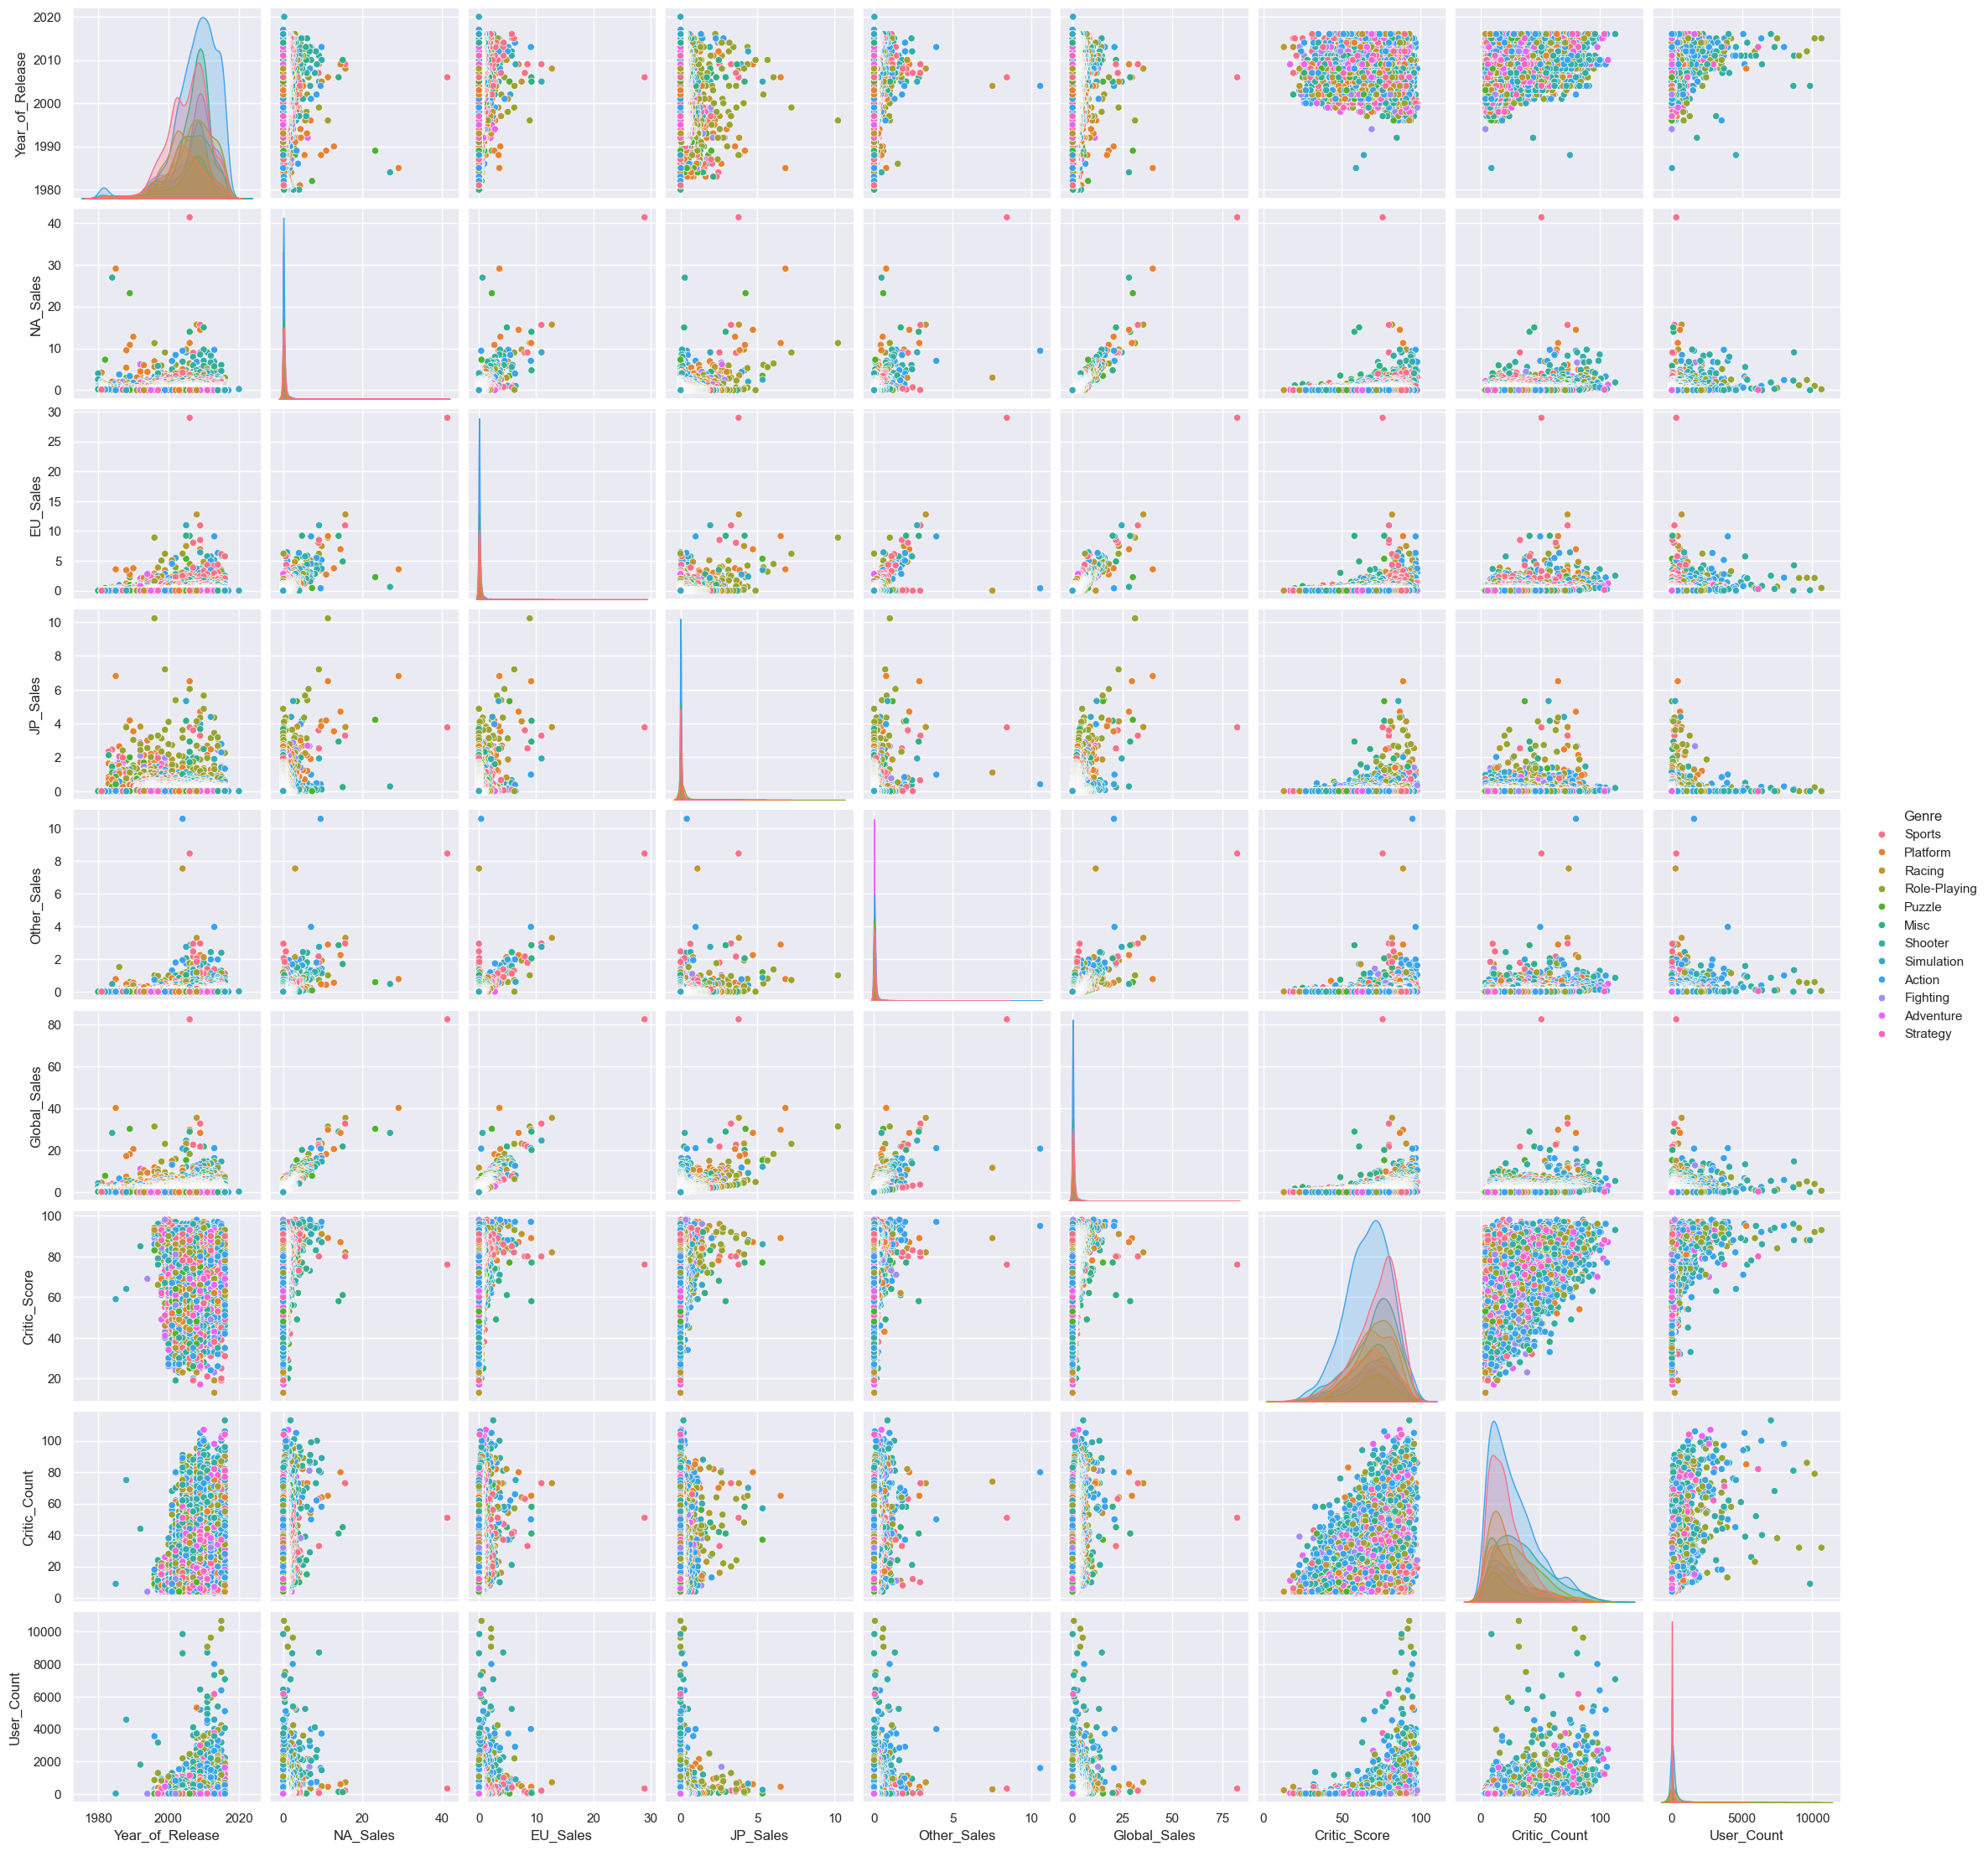

In [ ]:
#sns.pairplot(game_data, hue='Genre')

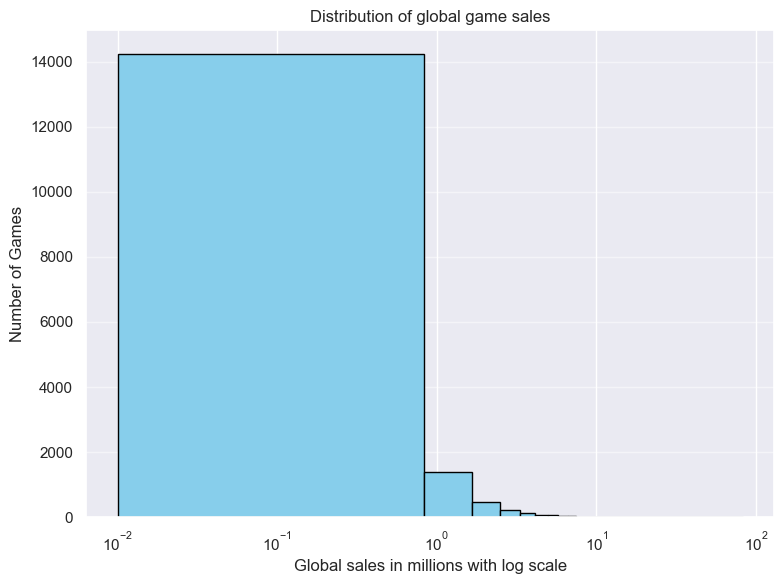

In [8]:
# Global sales distribution
plt.figure(figsize=(8, 6))
plt.hist(game_data['Global_Sales'], bins=100, color='skyblue', edgecolor='black')
plt.xscale('log')
plt.xlabel('Global sales in millions with log scale')
plt.ylabel('Number of Games')
plt.title('Distribution of global game sales')
plt.grid(axis='y', alpha=0.5)
plt.tight_layout()
plt.show()


Markdown:
Global Sales Distribution
The histogram distribution is highly skewed to the right, most games sell in small volumes. 
Choice of display value millions with log scale gives a clear unbalanced distribution, otherwise the long flat tail would be difficult to visualize and compare with with the high volume bigger sales.

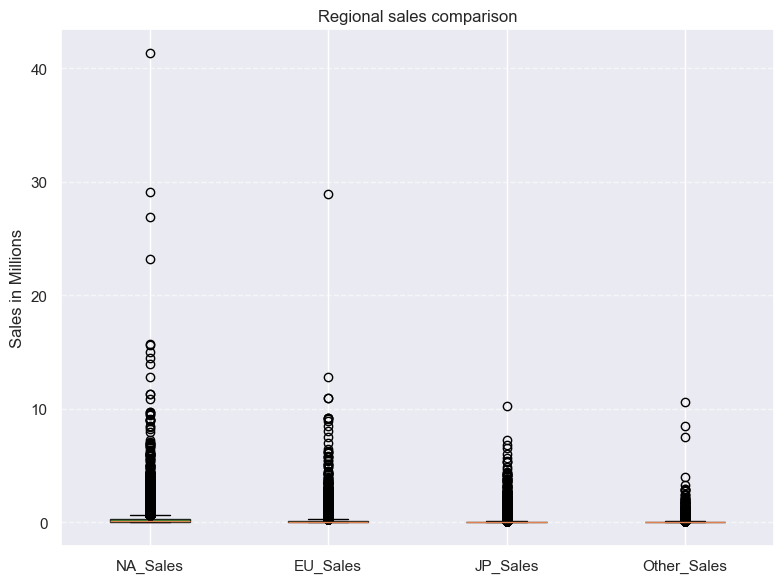

In [9]:
# Regional sales comparison
regions = ['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales']
plt.figure(figsize=(8,6))
plt.boxplot([game_data[r] for r in regions], 
            labels=regions, 
            patch_artist=True,
            boxprops=dict(facecolor='green', alpha=0.8))
plt.ylabel('Sales in Millions')
plt.title('Regional sales comparison')
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

Markdown:
Regional sales comparison
The boxplot comparison across North America, Europe, Japan and Other regions, in this case North America contribute significantly to global sales.
The goal of this visualization is to emphasize distribution shape and outliers, essentially to identify where volatility or dominance in different markets.

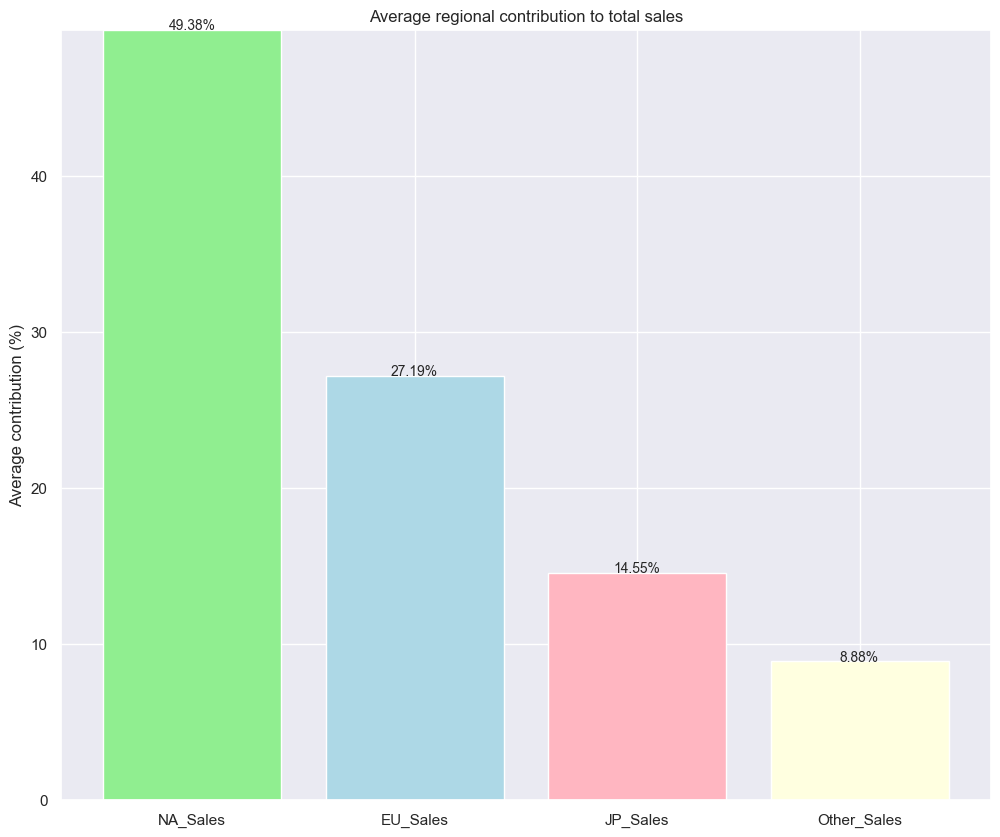

In [10]:
# Regional contribution to global sales with mean %
region_means = game_data[regions].mean()
region_percent = (region_means / region_means.sum()) * 100

plt.figure(figsize=(12,10))
plt.bar(region_percent.index, region_percent.values, color=['lightgreen', 'lightblue', 'lightpink', 'lightyellow'])
plt.ylabel('Average contribution (%)')
plt.title('Average regional contribution to total sales')

# Add percentage labels above each bar 
for bar_index, percentage_value in enumerate(region_percent.values):
    plt.text(x=bar_index, 
             y=percentage_value,
             s=f"{percentage_value:.2f}%", 
             ha='center', 
             fontsize=10)

# Set y-axis 
plt.ylim(0, max(region_percent.values))
plt.show()


## Markdown of Top 5 Publisher by Other sales
It’s important to identify who the major contributors are within the “Other_Sales” market, which represents regions outside North America, Europe, and Japan.
Understanding this segment reveals how well publishers are performing in emerging and secondary global markets such as Latin America, Oceania, and the Middle East.

The sales data are aggregated using the groupby() function on the Publisher field to sum all titles per publisher. The results are then sorted and filtered to the top five publishers to highlight the most dominant players in this category.

A new field, Percentage_Total_Sales created, the purpose is calculated each publisher’s share of total “Other_Sales” across all publishers.
This metric helps the reader quickly grasp the relative global influence of each company within the “Other_Sales” segment.

Visualization 1:
The horizontal bar chart presents the top five publishers ranked by total Other_Sales (in millions).
Direct data labels are added to each bar for immediate numerical clarity, while the bars are sorted from highest to lowest to improve executive readability.
This design allows decision-makers to quickly identify which publishers dominate the “Other_Sales” markets and how large their lead is over competitors.

Visualization 2:
The pie chart provides a quick-glance summary of the Top 5 publishers’ “Other_Sales” and their respective share of the total market.
Each slice is labeled with the publisher’s name, absolute sales value, percentage contribution, showing how much each publisher contributes to the overall “Other_Sales” market.
This proportional visualization effectively communicates the market concentration, revealing that a handful of major publishers account for more than half of all “Other_Sales” globally.

In [11]:
# Top 5 publishers by global sales
top5_publishers = game_data.groupby('Publisher')['Global_Sales'].sum().sort_values(ascending=False).head(5)
top5_publishers

Publisher
Nintendo                       1788.81
Electronic Arts                1116.96
Activision                      731.16
Sony Computer Entertainment     606.48
Ubisoft                         471.61
Name: Global_Sales, dtype: float64

In [12]:

# Top 5 publishers by other sales
df_publisher = game_data.copy()
df_publisher['Publisher'] = df_publisher['Publisher'].fillna('Unknown')

# Group by all publishers other sales, sort descending
publisher_sales = df_publisher.groupby('Publisher', as_index=False)['Other_Sales'].sum().sort_values(by='Other_Sales', ascending=False)

# Select top 5 publishers
top5_publishers = publisher_sales.head(5).copy()

# Calculate percentage of top 5 publishers' contribution to total other sales
total_other_sales = publisher_sales['Other_Sales'].sum()
top5_publishers['Percentage_Total_Sales'] = ((top5_publishers['Other_Sales'] / total_other_sales) * 100).round(2)

top5_publishers



,Publisher,Other_Sales,Percentage_Total_Sales
139,Electronic Arts,128.96,16.30
361,Nintendo,94.68,11.96
458,Sony Computer Entertainment,79.67,10.07
21,Activision,75.81,9.58
497,Take-Two Interactive,55.72,7.04


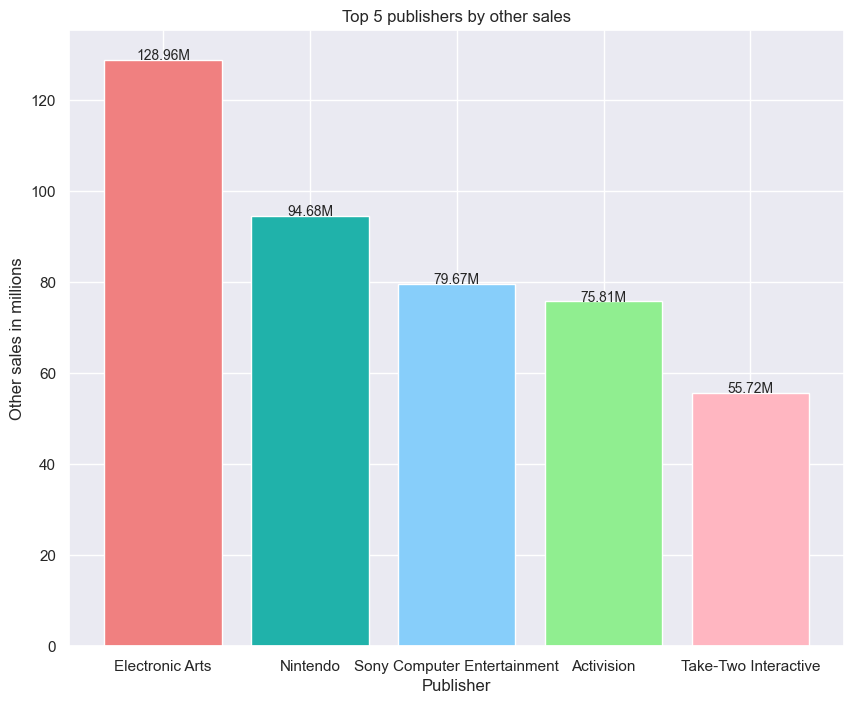

In [13]:
# Visualization 1: top 5 publisher by other sales bar chart 
plt.figure(figsize=(10,8))
bars = plt.bar(top5_publishers['Publisher'], top5_publishers['Other_Sales'],
               color=['lightcoral', 'lightseagreen', 'lightskyblue', 'lightgreen', 'lightpink'])
plt.xlabel('Publisher')
plt.ylabel('Other sales in millions')
plt.title('Top 5 publishers by other sales')

# Add value labels above each bar
for bar_index, sales_value in enumerate(top5_publishers['Other_Sales']):
    plt.text(x=bar_index,
             y=sales_value,
             s=f"{sales_value:.2f}M",
             ha='center',
             fontsize=10)

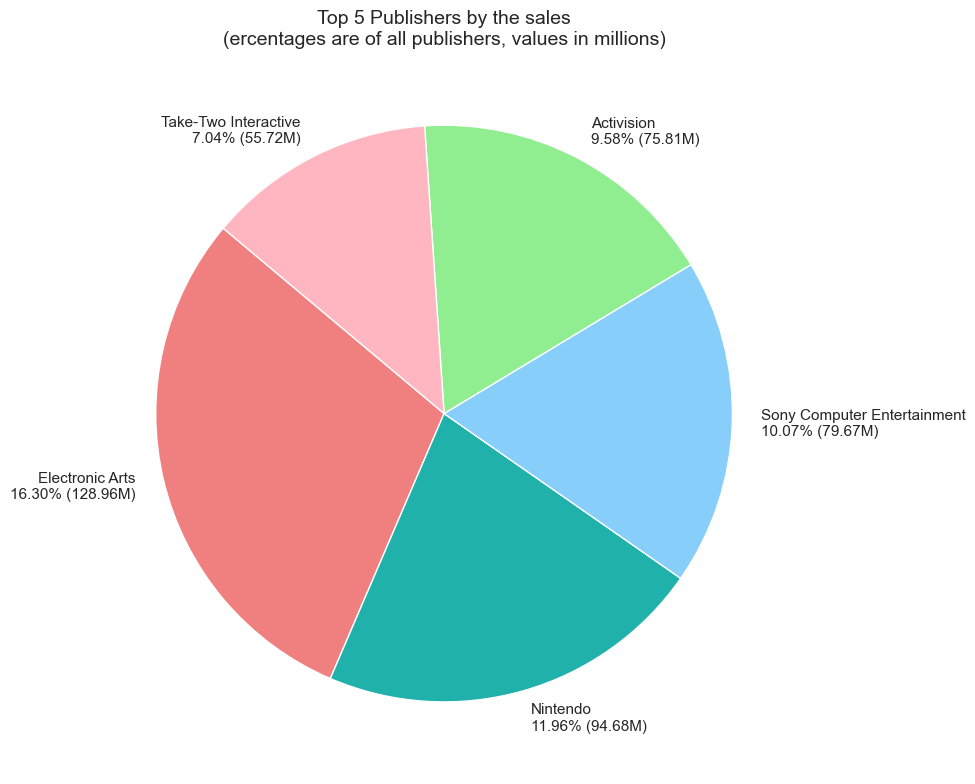

In [14]:
# Visualization 2: calculate percentage of total sales for top 5 publishers
plt.figure(figsize=(10,8))

# Build labels showing both % of all publishers and absolute value
labels = []
for i in range(len(top5_publishers)):
    publisher_name = top5_publishers.iloc[i]['Publisher']
    sales_millions = top5_publishers.iloc[i]['Other_Sales']
    pct_total = top5_publishers.iloc[i]['Percentage_Total_Sales']
    labels.append(f"{publisher_name}\n{pct_total:.2f}% ({sales_millions:.2f}M)")

# Plot the pie chart 
plt.pie(top5_publishers['Other_Sales'],
        labels=labels,
        colors=['lightcoral', 'lightseagreen', 'lightskyblue', 'lightgreen', 'lightpink'],
        startangle=140)

plt.title("Top 5 Publishers by the sales\n(ercentages are of all publishers, values in millions)",
          fontsize=14)
plt.tight_layout()
plt.show()

Markdown:
EU and Japanese markets 
We can start with filtering period from year 2010 to 2014, we only extract EU_Sales, JP_Sales and Year_of_Release fields. 
Remove missing or 0 values to prevent bias in correlation and calculate correlation coefficient.
The correlation of 0.304 suggests the relationship between European and Japanese game sales is not statistically strong.
Some games perform well in Europe also achieved moderate success in Japan but majority are not.
The weak linear relationship indicates the market success in one region is not reliably to predict of success in the other markets.

Markdown:
Visualization: Scatter plot with regression line
Scatter plots are the standard tool to show correlation strength and direction between two continuous variables.
The Skyblue points represent individual games, indicating the spread of performance between regions. The Red regression line summarize the overall linear trend. Only slightly flat and upwards representing 0.304 which convey weak correlation despite it's a positive value. The sales performance in Europe and Japan should be treated as largely independent.

## What is the distribution of the 3 most poplular game genres by 'Critic_Score'?
This exploration identifies the 3 game genres most popular by critics, examining how their Critic_Score values are distributed.
The goal is to understand not only which genres achieve the highest average acclaim, but also how consistent or variable those scores are across all genres.

Data preparation and analytical approach:
Missing values are detected in both Critic_Score and Genre. Approach: drop na
The dataset is grouped by Genre and apply mean for each, then sorted values in descending order. 

In [15]:
# Drop missing values of critic score or genre
df_critics = game_data.dropna(subset=['Critic_Score', 'Genre'])

# Identify Top 3 genres by mean critic score
top3_genres = (
    df_critics.groupby('Genre', as_index=False)['Critic_Score'].mean()
    .sort_values(by='Critic_Score', ascending=False)
    )

# Filter dataset for these top 3 genres
top3_data = df_critics[df_critics['Genre'].isin(top3_genres['Genre'])]

top3_genres.head(3)

,Genre,Critic_Score
7,Role-Playing,72.652646
11,Strategy,72.086093
10,Sports,71.968174


In [16]:
# Ensure only top3 genres are in the dataset 
genre_data = df_critics[df_critics['Genre'].isin(top3_genres['Genre'])]
print("Genres in genre_data:", genre_data['Genre'].unique())

Genres in genre_data: ['Sports' 'Racing' 'Platform' 'Misc' 'Action' 'Puzzle' 'Shooter'
 'Fighting' 'Simulation' 'Role-Playing' 'Adventure' 'Strategy']


Visualization 1: Boxplot distribution by all genres
The boxplot displays the distribution of critic scores across all genres, showing median, spread, and outliers.
This visualization helps reveal how critic opinions vary from genre to genre and highlights consistency in review patterns.
The mean Critic_Scores are relatively close, there are no wild outliers across most genres, this suggests that critical preception is relatively stable regardless of genre.


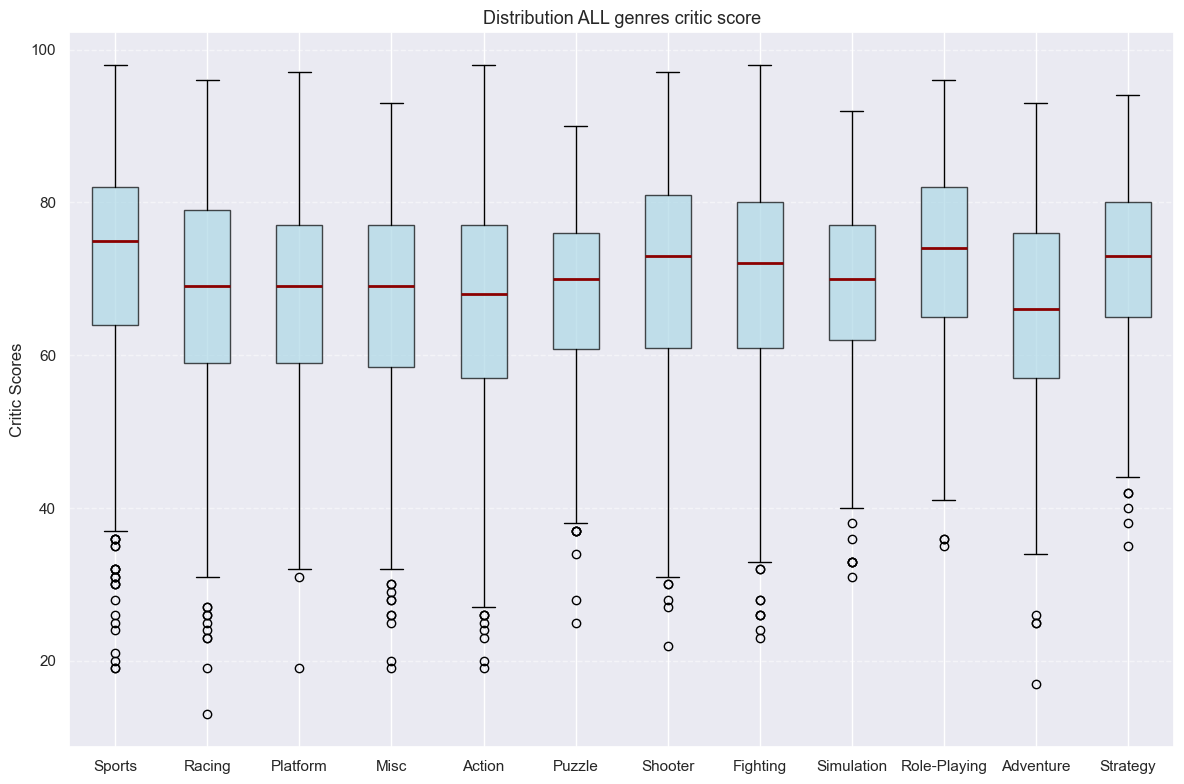

In [17]:
# Visualization 1: Box plot for all genres critic scores
plt.figure(figsize=(12,8))
plt.boxplot(
    [genre_data[genre_data['Genre'] == genre]['Critic_Score'] for genre in genre_data['Genre'].unique()],
    labels=genre_data['Genre'].unique(),
    patch_artist=True,
    boxprops=dict(facecolor='lightblue', alpha=0.7),
    medianprops=dict(color='darkred', linewidth=2)
)

plt.title('Distribution ALL genres critic score', fontsize=13)
plt.ylabel('Critic Scores')
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()


Visualization 2: Overlaid histograms of top 3 genres
The overlaid histograms provide a more granular view of score distribution among the top three genres: Role-Playing, Strategy, and Sports. Colour of choices, have tried a number of colour combinations, red blue and grey worked out well in this overlaid presentation, the transparency and contrast compliment each other rather than blocking trends.

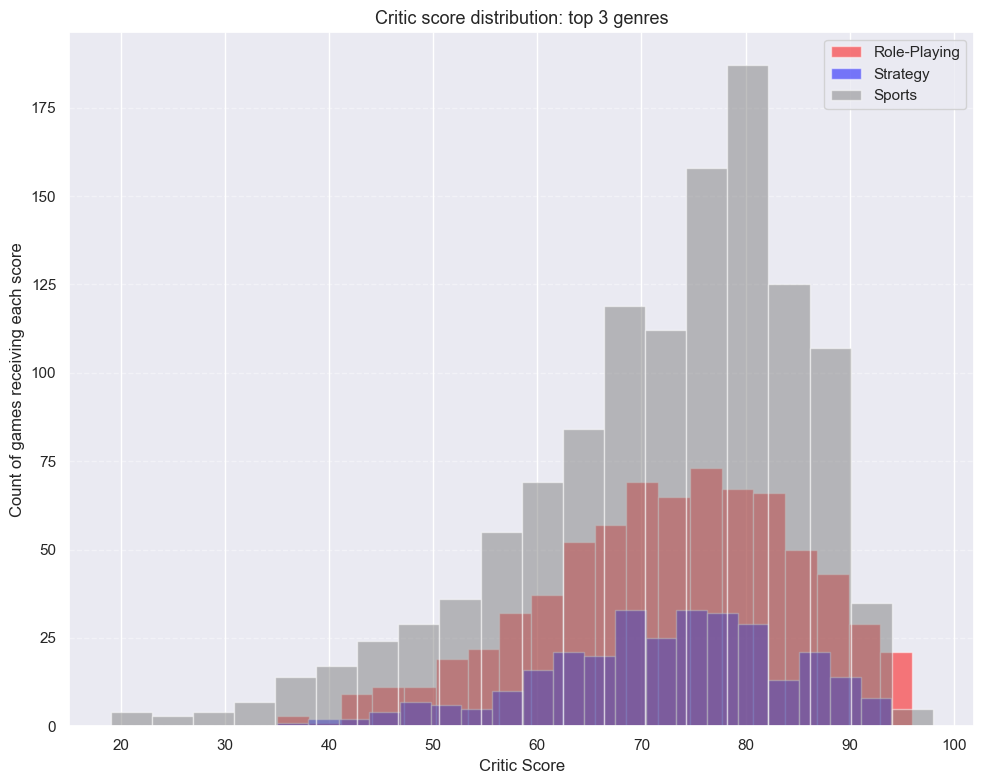

In [18]:
#  Visualization 2: Overlaid histograms for score distribution comparison
plt.figure(figsize=(10,8))
for genre, color in zip(top3_genres['Genre'], ['red', 'blue', 'grey']):
    subset = top3_data[top3_data['Genre'] == genre]
    plt.hist(subset['Critic_Score'], bins=20, alpha=0.5, label=genre, color=color)

plt.title('Critic score distribution: top 3 genres', fontsize=13)
plt.xlabel('Critic Score')
plt.ylabel('Count of games receiving each score')
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.4)
plt.tight_layout()
plt.show()


## Do older games (2005 and earlier) have a higher MEAN “na_sales” than newer games (after 2005)?  

The analysis shows that older games (2005 and earlier) achieved a higher mean North American sales of 0.32 million units, compared to 0.23 million units for newer titles. The difference reflected the mass-market dominance of early console generations, limited competition across fewer platforms / game distributors.

The boxplot visualization highlights a wider range of sales and more outliers among older games. If you remember the global success of Super Mario, Grand Theft Auto, Wii Sports. Those games reached broad audiences via blockbusters franchises even you weren't a gamer nor actively playing those games, the mass reach was a global hit and it has embedded in the generations as the market starting to shift. According to data, since year 2005, we saw a narrower, more compact distribution of sales. This suggests a market shift: as gaming platforms starting to shift from console to online, mobile ecosystems, gaming no longer just entertainment, it also started to form communities that fragmented into specialized segments, more targeted niches, genre specific communities, live streaming gaming experiences, character skin niche digital products, subscription based ecosystems, offline meetup merchandise community shows, all of these are resulting in more consistent but smaller sales average per game. 

From the commercial perspective, this shift marks a transition from a mass global hits to specific targeted engagements. Game publishers, distributors and retailers today are no longer replicating the one-size-fits-all blockbuster model, but rather executing highly curated community based engagement experience for a much defined gaming audience segments. That has been the trend in recent years and its continuing to reshape gaming platform and portfolio decisions across the gaming industry.

In [19]:
# Drop missing year of release from dataset
game_release = game_data.dropna(subset=['Year_of_Release']).copy()

# Categorize year of release, pre 2005 or 2005 and after
game_release['Game_Era'] = game_release['Year_of_Release'].apply(
    lambda x: 'Older or in 2005' if x <= 2005 else 'New release after 2005')

# Group by year category and calculate mean of NA sales
era_order = ['Older or in 2005', 'New release after 2005']

# Set index to ensure older of the order of year release
older_game_sales = (game_release
    .groupby('Game_Era', as_index=False)['NA_Sales']
    .mean().round(2)
    .set_index('Game_Era').loc[era_order].reset_index()
)
print(older_game_sales)

                 Game_Era  NA_Sales
0        Older or in 2005      0.32
1  New release after 2005      0.23


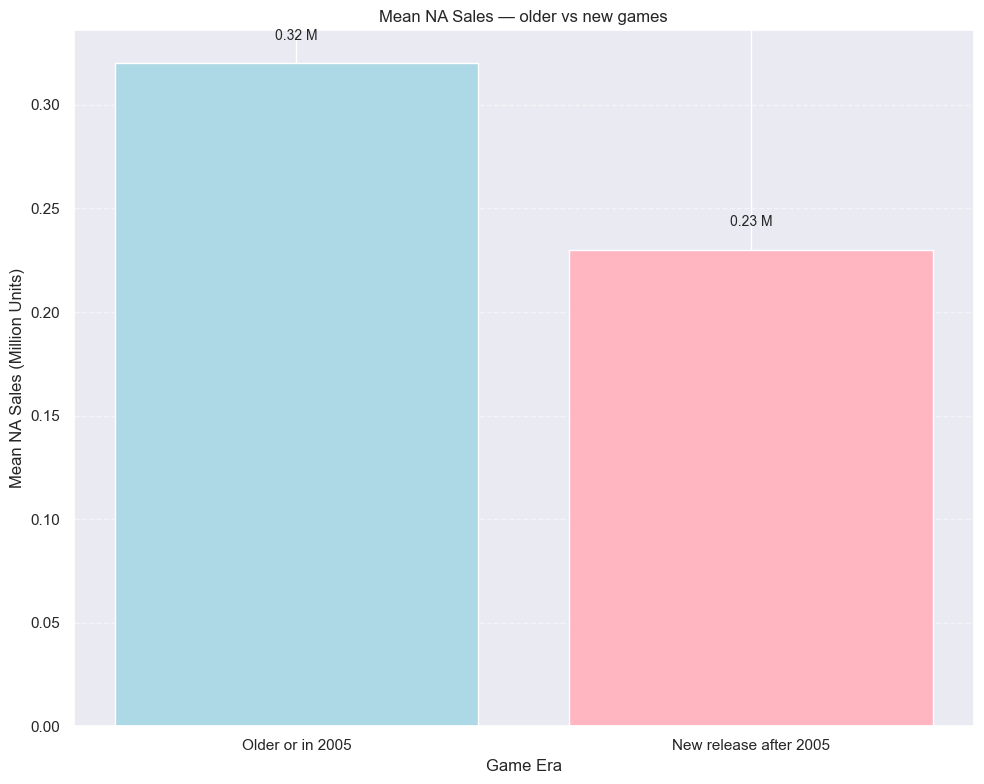

In [20]:
# Use the correct column name and plot once
plt.figure(figsize=(10,8))
bars = plt.bar(
    older_game_sales['Game_Era'],
    older_game_sales['NA_Sales'],
    color=['lightblue', 'lightpink']
)
plt.title('Mean NA Sales — older vs new games', fontsize=12)
plt.xlabel('Game Era')
plt.ylabel('Mean NA Sales (Million Units)')

for bar in bars:
    h = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, h + 0.01, f"{h:.2f} M",
             ha='center', va='bottom', fontsize=10)

plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()


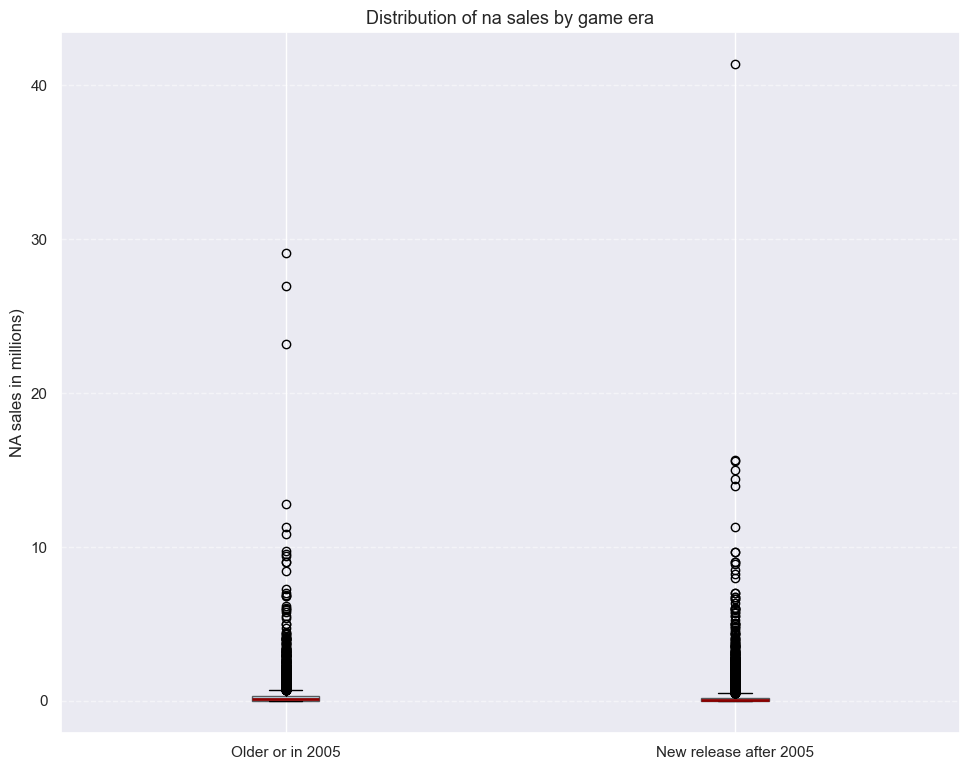

In [21]:
plt.figure(figsize=(10,8), dpi=100)
plt.boxplot(
    [
        game_release[game_release['Game_Era'] == 'Older or in 2005']['NA_Sales'],
        game_release[game_release['Game_Era'] == 'New release after 2005']['NA_Sales']
    ],
    labels=era_order,
    patch_artist=True,
    boxprops=dict(facecolor='lightblue', alpha=0.6),
    medianprops=dict(color='darkred', linewidth=2)
)
plt.title('Distribution of na sales by game era', fontsize=13)
plt.ylabel('NA sales in millions)')
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout(pad=1.5)
plt.show()


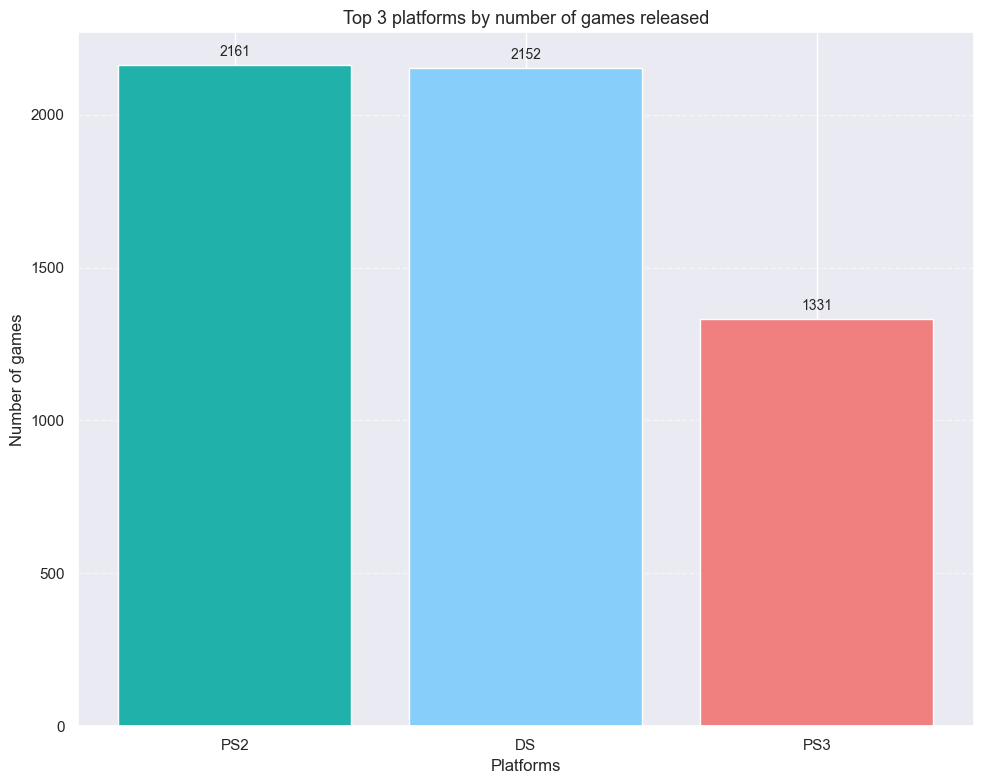

In [23]:
plt.figure(figsize=(10,8))
bars = plt.bar(top3_platforms['Platform'], top3_platforms['Count'],
               color=['lightseagreen', 'lightskyblue', 'lightcoral'])
plt.title('Top 3 platforms by number of games released', fontsize=13)
plt.xlabel('Platforms')
plt.ylabel('Number of games')

# Add value labels above bars
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, height + 20,
             f"{int(height)}", ha='center', va='bottom', fontsize=10)

plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()


In [24]:
# Drop missing year or user score
user_ratings = game_data.dropna(subset=['Year_of_Release', 'User_Score']).copy()

# Convert User_Score to numeric (if stored as string)
user_ratings['User_Score'] = pd.to_numeric(user_ratings['User_Score'], errors='coerce')

# Filter for highly rated games (User_Score ≥ 8)
high_score_games = user_ratings[user_ratings['User_Score'] >= 8.0]

# Group by release year — count and proportion
rating_summary = (
    high_score_games.groupby('Year_of_Release')
    .size()
    .reset_index(name='High_Rated_Count')
)

# Total games per year for proportion
total_per_year = (
    user_ratings.groupby('Year_of_Release')
    .size()
    .reset_index(name='Total_Count')
)

# Merge datasets and calculate percentage
rating_summary = pd.merge(rating_summary, total_per_year, on='Year_of_Release', how='left')
rating_summary['Percentage_High_Rated'] = (rating_summary['High_Rated_Count'] / rating_summary['Total_Count'] * 100).round(2)

# Sort by year
rating_summary = rating_summary.sort_values('Year_of_Release')
rating_summary.head()


,Year_of_Release,High_Rated_Count,Total_Count,Percentage_High_Rated
0,1992.0,1,1,100.00
1,1996.0,6,8,75.00
2,1997.0,14,19,73.68
3,1998.0,27,31,87.10
4,1999.0,26,39,66.67


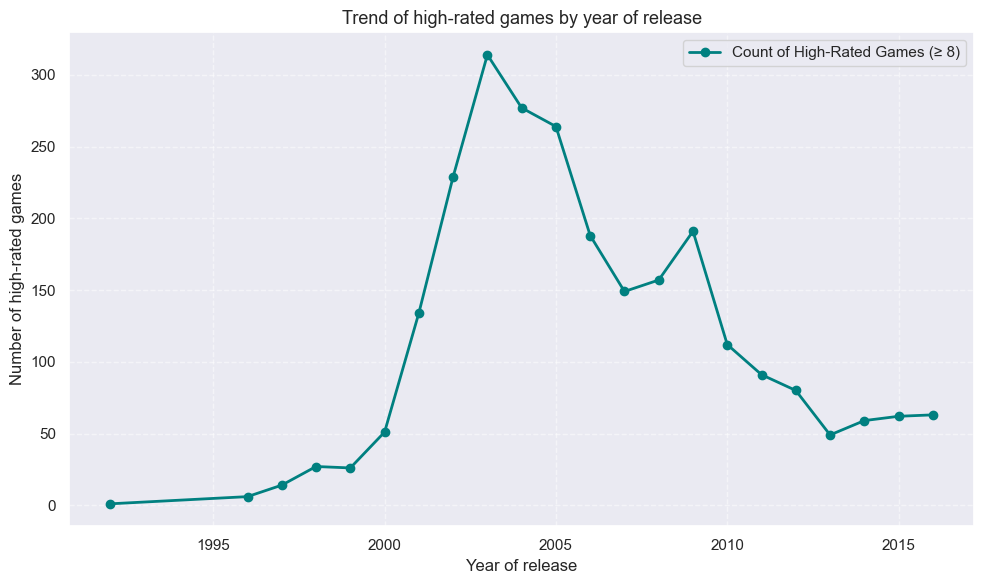

In [25]:
plt.figure(figsize=(10,6))
plt.plot(rating_summary['Year_of_Release'], rating_summary['High_Rated_Count'],
         marker='o', color='teal', linewidth=2, label='Count of High-Rated Games (≥ 8)')
plt.title('Trend of high-rated games by year of release', fontsize=13)
plt.xlabel('Year of release')
plt.ylabel('Number of high-rated games')
plt.grid(True, linestyle='--', alpha=0.5)
plt.legend()
plt.tight_layout()
plt.show()


In [26]:
from scipy.stats import ttest_ind

# Drop missing values
user_ratings = game_data.dropna(subset=['Year_of_Release', 'User_Score']).copy()
# Ensure clean numeric conversion
user_ratings['User_Score'] = pd.to_numeric(user_ratings['User_Score'], errors='coerce')

# Split into two eras pre and post 2005
era1 = user_ratings[user_ratings['Year_of_Release'] <= 2005]['User_Score'].dropna()
era2 = user_ratings[user_ratings['Year_of_Release'] > 2005]['User_Score'].dropna()

# Compute descriptive stats
mean_era1 = np.mean(era1)
mean_era2 = np.mean(era2)

# Run t-test
t_stat, p_val = ttest_ind(era1, era2, equal_var=False)

print(f"Mean User_Score (≤2005): {mean_era1:.2f}")
print(f"Mean User_Score (>2005): {mean_era2:.2f}")
print(f"T-statistic: {t_stat:.3f}")
print(f"P-value: {p_val:.9f}")


Mean User_Score (≤2005): 7.68
Mean User_Score (>2005): 6.84
T-statistic: 24.641
P-value: 0.000000000


To test whether my personal loss of interests reflected a wider industry shift or simply my preference of genre changed, I compared user-rated satisfaction before and after 2005 the turning point when consoles, monetization models, mobile trend and gameplay design all began evolving.

After converting all User_Score values to numeric and removing missing values, I performed an independent two-sample t-test between two groups: Era 1: Games released in or before 2005, Era 2: Games released after 2005

As above output:
Mean User_Score (≤2005): 7.68
Mean User_Score (>2005): 6.84
T-statistic: 24.641
P-value: 0.000000000

What I care the most is the P-Value, t’s literally zero, meaning there is less than a 0.01% chance that this difference occurred by random fluctuation.

The average player sentiment clearly shifted. Games from earlier generations were not only easier to play and more inclusive but also rated significantly higher by users. The data validates what many players, myself included, have felt for years: the era that once united families and friends around shared fun gradually gave way to experiences that became more complex, sophisticated, commercialized, and niche.

This isn't just nostalgia, it's statistically supported trend. The creative direction of the gaming industry did inpact how players felt about their experiences.

While my individual disengagement may have felt personal at the time, the statistical evidence tells a larger story.
The collective player base echoed the same sentiment, as the industry matured and diversified, overall satisfaction scores began to decline. 

So the joy I lost wasn’t just my own, it was part of a broader cultural and creative shift in gaming.